In [46]:
import numpy as np
import scipy
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
from SINDyFunctions import *

# def VDPEqs(t,X,mu):
#     x = X[0]
#     y = X[1]
#     x_dot = y
#     y_dot = -mu*x**2*y-x+mu*y
#     return [x_dot,y_dot]

# def simulateVDP(X0,Deltat_sim,gridDensity,mu):
#     # numerical integration
#     t_span = [0,Deltat_sim]
#     t_eval = np.linspace(0,Deltat_sim,gridDensity*Deltat_sim+1)
#     soln = scipy.integrate.solve_ivp(VDPEqs,t_span,X0,args=[mu],method="RK45",t_eval=t_eval)
#     t = soln.t
#     [x,y] = soln.y
#     # exact derivatives from simulation
#     x_dot = []
#     y_dot = []
#     for i in range(0,len(t)):
#         X = [x[i],y[i]]
#         [dxdt,dydt] = VDPEqs(t,X,mu)
#         x_dot.append(dxdt)
#         y_dot.append(dydt)
#     # log data
#     t_out = np.array(t).reshape(len(t),1)
#     x = np.array(x).reshape(len(t),1)
#     y = np.array(y).reshape(len(t),1)
#     X_out = np.hstack([x,y])
#     x_dot = np.array(x_dot).reshape(len(t),1)
#     y_dot = np.array(y_dot).reshape(len(t),1)
#     X_dot_out = np.hstack([x_dot,y_dot])
#     return [t_out,X_out,X_dot_out]

# def LVEqs(t,X,beta):
#     x = X[0]
#     y = X[1]
#     x_dot = 3*x-beta*x*y
#     y_dot = -6*y+beta*x*y
#     return [x_dot,y_dot]

# def simulateLV(X0,Deltat_sim,gridDensity,beta):
#     # numerical integration
#     t_span = [0,Deltat_sim]
#     t_eval = np.linspace(0,Deltat_sim,gridDensity*Deltat_sim+1)
#     soln = scipy.integrate.solve_ivp(LVEqs,t_span,X0,args=[beta],method="RK45",t_eval=t_eval)
#     t = soln.t
#     [x,y] = soln.y
#     # exact derivatives from simulation
#     x_dot = []
#     y_dot = []
#     for i in range(0,len(t)):
#         X = [x[i],y[i]]
#         [dxdt,dydt] = LVEqs(t,X,beta)
#         x_dot.append(dxdt)
#         y_dot.append(dydt)
#     # log data
#     t_out = np.array(t).reshape(len(t),1)
#     x = np.array(x).reshape(len(t),1)
#     y = np.array(y).reshape(len(t),1)
#     X_out = np.hstack([x,y])
#     x_dot = np.array(x_dot).reshape(len(t),1)
#     y_dot = np.array(y_dot).reshape(len(t),1)
#     X_dot_out = np.hstack([x_dot,y_dot])
#     return [t_out,X_out,X_dot_out]

# # ---library---
# def calcTheta_VDP(arr_t,arr_x,arr_y):
#     Theta = np.zeros([len(arr_t),10])
#     for i in range(0,len(arr_t)):
#         x = arr_x[i]
#         y = arr_y[i]
#         Theta[i,0] = 1
#         Theta[i,1] = x
#         Theta[i,2] = y
#         Theta[i,3] = x**2
#         Theta[i,4] = y**2
#         Theta[i,5] = x*y
#         Theta[i,6] = x**3
#         Theta[i,7] = y**3
#         Theta[i,8] = x**2*y
#         Theta[i,9] = x*y**2
#     return Theta

# def calcTheta_LV(arr_t,arr_x,arr_y):
#     Theta = np.zeros([len(arr_t),6])
#     for i in range(0,len(arr_t)):
#         x = arr_x[i]
#         y = arr_y[i]
#         Theta[i,0] = 1
#         Theta[i,1] = x
#         Theta[i,2] = y
#         Theta[i,3] = x**2
#         Theta[i,4] = y**2
#         Theta[i,5] = x*y
#     return Theta

# # ---sparse regression---
# def sparseRegression_prescribedLambda(A,b,params_regression):
#     method = params_regression["method"]
#     if method == "least-squares":
#         N_loops = params_regression["N_loops"]
#         lambda_sparse = params_regression["lambda_sparse"]
#         x = np.linalg.pinv(A)@b
#         x = x.flatten()
#         b = b.flatten()
#         for i in range(1,N_loops+1):
#             smallInds = abs(x)<lambda_sparse
#             x[smallInds] = 0
#             bigInds = ~smallInds 
#             x[bigInds] = np.linalg.pinv(A[:,bigInds])@b
#     elif method == "ridge":
#         N_loops = params_regression["N_loops"]
#         lambda_sparse = params_regression["lambda_sparse"]
#         lambda_ridge = params_regression["lambda_ridge"]
#         x = np.linalg.solve(A.T@A+lambda_ridge*np.eye(A.shape[1]),A.T@b)
#         x = x.flatten()
#         b = b.flatten()
#         for i in range(1,N_loops+1):
#             smallInds = abs(x)<lambda_sparse
#             x[smallInds] = 0
#             bigInds = ~smallInds 
#             x[bigInds] = np.linalg.solve(A[:,bigInds].T@A[:,bigInds]+lambda_ridge*np.eye(A[:,bigInds].shape[1]),A[:,bigInds].T@b)
#     elif method == "lasso":
#         lambda_lasso = params_regression["lambda_lasso"]
#         lasso = Lasso(alpha=lambda_lasso)
#         lasso.fit(A,b)
#         x = lasso.coef_
#     x = x.reshape(-1,1)
#     return x

# def calcL(A,w_lambda,w0):
#     accuracyCost = np.linalg.norm(A@w_lambda-A@w0)/np.linalg.norm(A@w0)
#     sparsityCost = np.sum(w_lambda!=0)/A.shape[1]
#     return accuracyCost+sparsityCost

# def sparseRegression_autoLambda(A,b,params_regression):
#     # compute w0
#     if params_regression["method"] == "least-squares":
#         w0 = np.linalg.pinv(A)@b
#     elif params_regression["method"] == "ridge":
#         lambda_ridge = params_regression["lambda_ridge"]
#         w0 = np.linalg.solve(A.T@A+lambda_ridge*np.eye(A.shape[1]),A.T@b)
#     # compute the optimal w_lambda
#     arr_lambda = np.logspace(-5,0,51)
#     arr_w_lambda = np.zeros((A.shape[1],51))
#     arr_L = np.zeros(arr_lambda.shape)
#     for i in range(0,len(arr_lambda)):
#         params_regression["lambda_sparse"] = arr_lambda[i]
#         w_lambda = sparseRegression_prescribedLambda(A,b,params_regression)
#         arr_w_lambda[:,i] = w_lambda.flatten()
#         arr_L[i] = calcL(A,w_lambda,w0)
#     ind = np.argmin(arr_L)
#     w_out = arr_w_lambda[:,ind]
#     return w_out.reshape(-1,1)

# # ---regular SINDy---
# # central finite difference
# def calcDerivatives_2D(t_out,X_out):
#     Deltat = np.diff(t_out.reshape(1,len(t_out)))
#     Deltax = np.diff(X_out[:,0].reshape(1,len(t_out)))
#     Deltay = np.diff(X_out[:,1].reshape(1,len(t_out)))
#     t_out = t_out[1:-1]
#     X_out = X_out[1:-1,:]
#     # forward step size
#     a = Deltat[0,1:]
#     Deltax_fwd = Deltax[0,1:]
#     Deltay_fwd = Deltay[0,1:]
#     # backward step size
#     b = Deltat[0,0:-1]
#     Deltax_bwd = Deltax[0,0:-1]
#     Deltay_bwd = Deltay[0,0:-1]
#     # derivatives
#     x_dot = (b**2*Deltax_fwd+a**2*Deltax_bwd)/(a**2*b+a*b**2)
#     y_dot = (b**2*Deltay_fwd+a**2*Deltay_bwd)/(a**2*b+a*b**2)
#     x_dot = x_dot.reshape(len(x_dot),1)
#     y_dot = y_dot.reshape(len(y_dot),1)
#     return x_dot,y_dot

# # SINDy
# def SINDy_VDP(t_out,X_out,params_regression):
#     x_dot,y_dot = calcDerivatives_2D(t_out,X_out)
#     Theta = calcTheta_VDP(t_out[1:-1],X_out[1:-1,0],X_out[1:-1,1])
#     if params_regression["lambda_sparse"] == "auto":
#         w1 = sparseRegression_autoLambda(Theta,x_dot,params_regression)
#         w2 = sparseRegression_autoLambda(Theta,y_dot,params_regression)
#     else:
#         w1 = sparseRegression_prescribedLambda(Theta,x_dot,params_regression)
#         w2 = sparseRegression_prescribedLambda(Theta,y_dot,params_regression)

#     w = np.hstack([w1,w2])
#     return w

# def SINDy_LV(t_out,X_out,params_regression):
#     x_dot,y_dot = calcDerivatives_2D(t_out,X_out)
#     Theta = calcTheta_LV(t_out[1:-1],X_out[1:-1,0],X_out[1:-1,1])
#     if params_regression["lambda_sparse"] == "auto":
#         w1 = sparseRegression_autoLambda(Theta,x_dot,params_regression)
#         w2 = sparseRegression_autoLambda(Theta,y_dot,params_regression)
#     else:
#         w1 = sparseRegression_prescribedLambda(Theta,x_dot,params_regression)
#         w2 = sparseRegression_prescribedLambda(Theta,y_dot,params_regression)

#     w = np.hstack([w1,w2])
#     return w

# # ---weak SINDy---
# # bump test functions
# def func_phi_bump(t,p,q,a,b):
#     C = 1/(p**p*q**q)*((p+q)/(b-a))**(p+q)
#     phi = C*(t-a)**p*(b-t)**q
#     return phi
# def func_phi_dot_bump(t,p,q,a,b):
#     C = 1/(p**p*q**q)*((p+q)/(b-a))**(p+q)
#     phi_dot = C*p*(t-a)**(p-1)*(b-t)**q-C*q*(t-a)**p*(b-t)**(q-1)
#     return phi_dot

# # bump weak SINDy
# def WSINDy_bump_VDP(t_out,X_out,N_p,N_q,params_regression):
#     # library
#     Theta = calcTheta_VDP(t_out,X_out[:,0],X_out[:,1])
#     # test function parameters
#     array_p = np.linspace(1,100,N_p)
#     array_q = np.linspace(1,100,N_q)
#     # find V and V_dot for Riemann sums
#     Deltat = np.diff(t_out.reshape(1,len(t_out)))
#     V_L = np.zeros([N_p*N_q,len(t_out)-1])
#     V_R = np.zeros([N_p*N_q,len(t_out)-1])
#     V_dot_L = np.zeros([N_p*N_q,len(t_out)-1])
#     V_dot_R = np.zeros([N_p*N_q,len(t_out)-1])
#     for n_p in range(0,N_p):
#         for n_q in range(0,N_q):
#             p = array_p[n_p]
#             q = array_q[n_q]
#             m = n_p*N_q+n_q   #(m+1)-th test function with index m
#             # V_L for left Riemann sum
#             Phi_L_m = func_phi_bump(t_out[0:-1],p,q,t_out[0],t_out[-1])
#             Phi_L_m = Phi_L_m.reshape(1,len(Phi_L_m))
#             V_L[m,:] = Deltat*Phi_L_m
#             # V_R for right Riemann sum
#             Phi_R_m = func_phi_bump(t_out[1:],p,q,t_out[0],t_out[-1])
#             Phi_R_m = Phi_R_m.reshape(1,len(Phi_R_m))
#             V_R[m,:] = Deltat*Phi_R_m
#             # V_dot_L for left Riemann sum
#             Phi_dot_L_m = func_phi_dot_bump(t_out[0:-1],p,q,t_out[0],t_out[-1])
#             Phi_dot_L_m = Phi_dot_L_m.reshape(1,len(Phi_dot_L_m))
#             V_dot_L[m,:] = Deltat*Phi_dot_L_m
#             # V_dot_R for right Riemann sum
#             Phi_dot_R_m = func_phi_dot_bump(t_out[1:],p,q,t_out[0],t_out[-1])
#             Phi_dot_R_m = Phi_dot_R_m.reshape(1,len(Phi_dot_R_m))
#             V_dot_R[m,:] = Deltat*Phi_dot_R_m
#     # compute A and b from trapezoid integral
#     ## A
#     A_L = V_L@Theta[0:-1,:]
#     A_R = V_R@Theta[1:,:]
#     A_trapz = (A_L+A_R)/2
#     ## b1
#     b1_L = -V_dot_L@X_out[0:-1,0]
#     b1_R = -V_dot_R@X_out[1:,0]
#     b1_trapz = (b1_L+b1_R)/2
#     ## b2
#     b2_L = -V_dot_L@X_out[0:-1,1]
#     b2_R = -V_dot_R@X_out[1:,1]
#     b2_trapz = (b2_L+b2_R)/2
#     # sparse regression
#     if params_regression["lambda_sparse"] == "auto":
#         w1 = sparseRegression_autoLambda(A_trapz,b1_trapz,params_regression)
#         w2 = sparseRegression_autoLambda(A_trapz,b2_trapz,params_regression)   
#     else:
#         w1 = sparseRegression_prescribedLambda(A_trapz,b1_trapz,params_regression)
#         w2 = sparseRegression_prescribedLambda(A_trapz,b2_trapz,params_regression)   

#     w = np.hstack([w1,w2])
#     return w

# def WSINDy_bump_LV(t_out,X_out,N_p,N_q,params_regression):
#     # library
#     Theta = calcTheta_LV(t_out,X_out[:,0],X_out[:,1])
#     # test function parameters
#     array_p = np.linspace(1,100,N_p)
#     array_q = np.linspace(1,100,N_q)
#     # find V and V_dot for Riemann sums
#     Deltat = np.diff(t_out.reshape(1,len(t_out)))
#     V_L = np.zeros([N_p*N_q,len(t_out)-1])
#     V_R = np.zeros([N_p*N_q,len(t_out)-1])
#     V_dot_L = np.zeros([N_p*N_q,len(t_out)-1])
#     V_dot_R = np.zeros([N_p*N_q,len(t_out)-1])
#     for n_p in range(0,N_p):
#         for n_q in range(0,N_q):
#             p = array_p[n_p]
#             q = array_q[n_q]
#             m = n_p*N_q+n_q   #(m+1)-th test function with index m
#             # V_L for left Riemann sum
#             Phi_L_m = func_phi_bump(t_out[0:-1],p,q,t_out[0],t_out[-1])
#             Phi_L_m = Phi_L_m.reshape(1,len(Phi_L_m))
#             V_L[m,:] = Deltat*Phi_L_m
#             # V_R for right Riemann sum
#             Phi_R_m = func_phi_bump(t_out[1:],p,q,t_out[0],t_out[-1])
#             Phi_R_m = Phi_R_m.reshape(1,len(Phi_R_m))
#             V_R[m,:] = Deltat*Phi_R_m
#             # V_dot_L for left Riemann sum
#             Phi_dot_L_m = func_phi_dot_bump(t_out[0:-1],p,q,t_out[0],t_out[-1])
#             Phi_dot_L_m = Phi_dot_L_m.reshape(1,len(Phi_dot_L_m))
#             V_dot_L[m,:] = Deltat*Phi_dot_L_m
#             # V_dot_R for right Riemann sum
#             Phi_dot_R_m = func_phi_dot_bump(t_out[1:],p,q,t_out[0],t_out[-1])
#             Phi_dot_R_m = Phi_dot_R_m.reshape(1,len(Phi_dot_R_m))
#             V_dot_R[m,:] = Deltat*Phi_dot_R_m
#     # compute A and b from trapezoid integral
#     ## A
#     A_L = V_L@Theta[0:-1,:]
#     A_R = V_R@Theta[1:,:]
#     A_trapz = (A_L+A_R)/2
#     ## b1
#     b1_L = -V_dot_L@X_out[0:-1,0]
#     b1_R = -V_dot_R@X_out[1:,0]
#     b1_trapz = (b1_L+b1_R)/2
#     ## b2
#     b2_L = -V_dot_L@X_out[0:-1,1]
#     b2_R = -V_dot_R@X_out[1:,1]
#     b2_trapz = (b2_L+b2_R)/2
#     # sparse regression
#     if params_regression["lambda_sparse"] == "auto":
#         w1 = sparseRegression_autoLambda(A_trapz,b1_trapz,params_regression)
#         w2 = sparseRegression_autoLambda(A_trapz,b2_trapz,params_regression)   
#     else:
#         w1 = sparseRegression_prescribedLambda(A_trapz,b1_trapz,params_regression)
#         w2 = sparseRegression_prescribedLambda(A_trapz,b2_trapz,params_regression)   

#     w = np.hstack([w1,w2])
#     return w

# # Fourier weak SINDy
# def constructLS_Fourier_FFT(t_out,x_i,array_n,Theta):
#     Deltat = t_out[1]-t_out[0]
#     N = len(t_out.flatten())
#     omega0 = 2*np.pi/(t_out[-1]-t_out[0])

#     # compute Fourier coefficients for state variable
#     f_hat_x_i = np.fft.fft(x_i.flatten())   # FFT
#     f_hat_x_i = f_hat_x_i/N   # Fourier coefficients
#     a_n_x_i = 2*f_hat_x_i.real
#     b_n_x_i = -2*f_hat_x_i.imag

#     # compute Fourier coefficients for dictionary terms
#     a_n_Theta = np.zeros((len(t_out),Theta.shape[1]))
#     b_n_Theta = np.zeros((len(t_out),Theta.shape[1]))
#     for i in range(0,Theta.shape[1]):
#         f_hat = np.fft.fft(Theta[:,i].flatten())    # FFT
#         f_hat = f_hat/N   # Fourier coefficients
#         a_n_Theta[:,i] = 2*f_hat.real
#         b_n_Theta[:,i] = -2*f_hat.imag

#     # compute A and b
#     N_n = len(array_n)
#     A = b_n_Theta[1:N_n+1,:]
#     b = np.zeros((N_n,1))
#     for i in range(0,N_n):
#         n = i+1
#         b[i] = -n*omega0*a_n_x_i[n]

#     return A,b

# def WSINDy_Fourier_FFT_VDP(t_out,X_out,N_freq,params_regression):
#     omega0 = 2*np.pi/(t_out[-1]-t_out[0])
#     arr_x = X_out[:,0]
#     arr_y = X_out[:,1]
#     # set n-values
#     arr_n_x = np.linspace(1,N_freq,N_freq)
#     arr_n_y = np.linspace(1,N_freq,N_freq)
#     # library
#     Theta = calcTheta_VDP(t_out,arr_x,arr_y)
#     # A and b
#     A1,b1 = constructLS_Fourier_FFT(t_out,arr_x,arr_n_x,Theta)
#     A2,b2 = constructLS_Fourier_FFT(t_out,arr_y,arr_n_y,Theta)
#     # sparse regressions
#     if params_regression["lambda_sparse"] == "auto":
#         w1 = sparseRegression_autoLambda(A1,b1,params_regression)
#         w2 = sparseRegression_autoLambda(A2,b2,params_regression)
#     else:
#         w1 = sparseRegression_prescribedLambda(A1,b1,params_regression)
#         w2 = sparseRegression_prescribedLambda(A2,b2,params_regression)

#     w = np.hstack([w1,w2])
#     return w

# def WSINDy_Fourier_FFT_LV(t_out,X_out,N_freq,params_regression):
#     omega0 = 2*np.pi/(t_out[-1]-t_out[0])
#     arr_x = X_out[:,0]
#     arr_y = X_out[:,1]
#     # set n-values
#     arr_n_x = np.linspace(1,N_freq,N_freq)
#     arr_n_y = np.linspace(1,N_freq,N_freq)
#     # library
#     Theta = calcTheta_LV(t_out,arr_x,arr_y)
#     # A and b
#     A1,b1 = constructLS_Fourier_FFT(t_out,arr_x,arr_n_x,Theta)
#     A2,b2 = constructLS_Fourier_FFT(t_out,arr_y,arr_n_y,Theta)
#     # sparse regressions
#     if params_regression["lambda_sparse"] == "auto":
#         w1 = sparseRegression_autoLambda(A1,b1,params_regression)
#         w2 = sparseRegression_autoLambda(A2,b2,params_regression)
#     else:
#         w1 = sparseRegression_prescribedLambda(A1,b1,params_regression)
#         w2 = sparseRegression_prescribedLambda(A2,b2,params_regression)

#     w = np.hstack([w1,w2])
#     return w

# # ---error evaluations---
# def errorEval(w_true,w_ident):
#     # relative error norm
#     e = w_true-w_ident
#     errorNorm = np.linalg.norm(e,"fro")
#     errorNorm_rel = errorNorm/np.linalg.norm(w_true,"fro")
#     # spurious terms and terms failed to be identified
#     N_spurious = np.sum((w_true==0) & (w_ident!=0))
#     N_failed = np.sum((w_true!=0) & (w_ident==0))
#     # TPR
#     N_correct = np.sum((w_true==0) & (w_ident==0))
#     TPR = N_correct/(N_correct+N_spurious+N_failed)   
#     return errorNorm_rel,TPR

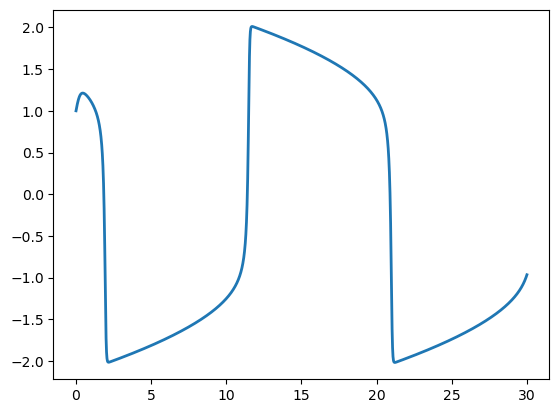

In [47]:
# ---simulate VDP---
mu = 10

w_true = np.zeros((10,2))
w_true[2,0] = 1
w_true[1,1] = -1
w_true[2,1] = mu
w_true[8,1] = -mu

X0 = np.array([1,1])
t_sim = 30
t_span = [0,t_sim]
t_out,X_out,XD_out = simulateVDP(X0,t_sim,100,mu)
x = X_out[:,0]
y = X_out[:,1]

fig = plt.figure()


plt.plot(t_out,x,linewidth=2)

plt.show()

In [48]:
w_true

array([[  0.,   0.],
       [  0.,  -1.],
       [  1.,  10.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0., -10.],
       [  0.,   0.]])

In [49]:
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.001
params_regression["N_loops"] = 100

w_ident = SINDy_VDP(t_out,X_out,params_regression)

w_ident

array([[ 0.        ,  0.        ],
       [ 0.        , -0.9986288 ],
       [ 0.99853674,  9.93851932],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        , -9.92401902],
       [ 0.        ,  0.        ]])

In [50]:
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.001
params_regression["N_loops"] = 100
startTime = time.perf_counter()
w_ident = WSINDy_Fourier_FFT_VDP(t_out,X_out,60,params_regression)
endTime = time.perf_counter()
timeConsumed = endTime-startTime
print(f"w_ident =")
print(w_ident)
print(f"{timeConsumed} s consumed")

w_ident =
[[ 0.          0.        ]
 [ 0.         -1.00915709]
 [ 0.99920063  9.97942273]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.         -9.97851691]
 [ 0.          0.        ]]
0.011206999886780977 s consumed


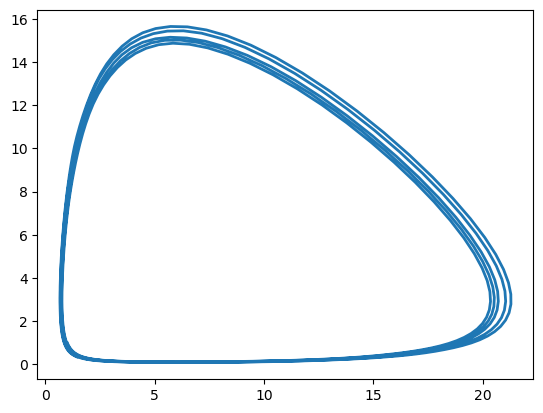

In [51]:
# ---simulate LV---
beta = 1

w_true = np.zeros((6,2))
w_true[1,0] = 3
w_true[5,0] = -beta
w_true[2,1] = -6
w_true[5,1] = beta

X0 = np.array([1,1])
t_sim = 10
t_span = [0,t_sim]
t_out,X_out,XD_out = simulateLV(X0,t_sim,100,beta)
x = X_out[:,0]
y = X_out[:,1]

fig = plt.figure()


plt.plot(x,y,linewidth=2)

plt.show()

In [52]:
w_true

array([[ 0.,  0.],
       [ 3.,  0.],
       [ 0., -6.],
       [ 0.,  0.],
       [ 0.,  0.],
       [-1.,  1.]])

In [53]:
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.001
params_regression["N_loops"] = 100

w_ident = SINDy_LV(t_out,X_out,params_regression)

w_ident

array([[ 0.        ,  0.        ],
       [ 2.99645702,  0.        ],
       [ 0.        , -5.95735141],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-1.00035242,  0.99673458]])

In [54]:
params_regression = dict()
params_regression["method"] = "ridge"
params_regression["lambda_sparse"] = 0.5
params_regression["lambda_ridge"] = 0.001
params_regression["N_loops"] = 100
startTime = time.perf_counter()
w_ident = WSINDy_Fourier_FFT_LV(t_out,X_out,60,params_regression)
endTime = time.perf_counter()
timeConsumed = endTime-startTime
print(f"w_ident =")
print(w_ident)
print(f"{timeConsumed} s consumed")

w_ident =
[[ 0.          0.        ]
 [ 3.031728    0.        ]
 [ 0.         -5.9768486 ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-1.00318499  1.00008655]]
0.006042799912393093 s consumed
